In [9]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import HTML
import csv

In [10]:

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
mp_drawing = mp.solutions.drawing_utils 

In [11]:
class Joint:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y


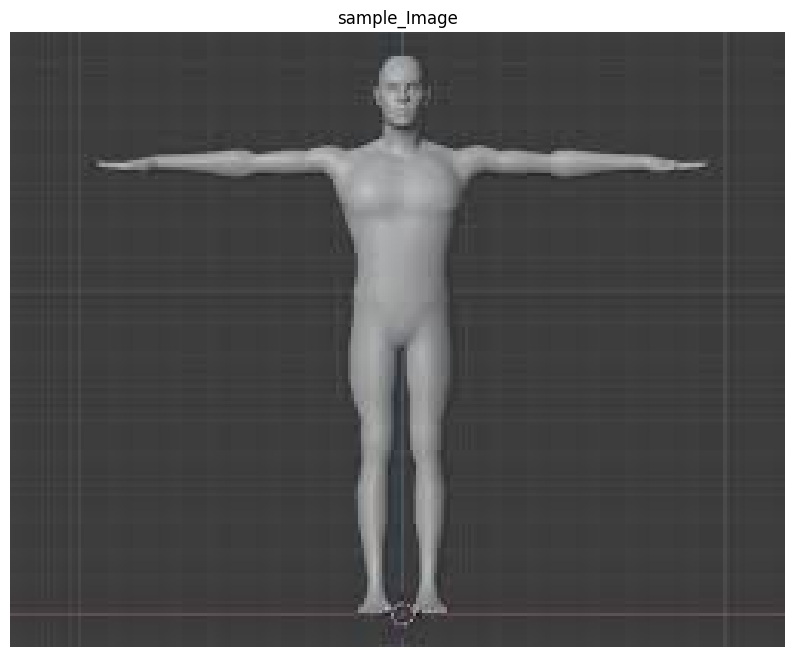

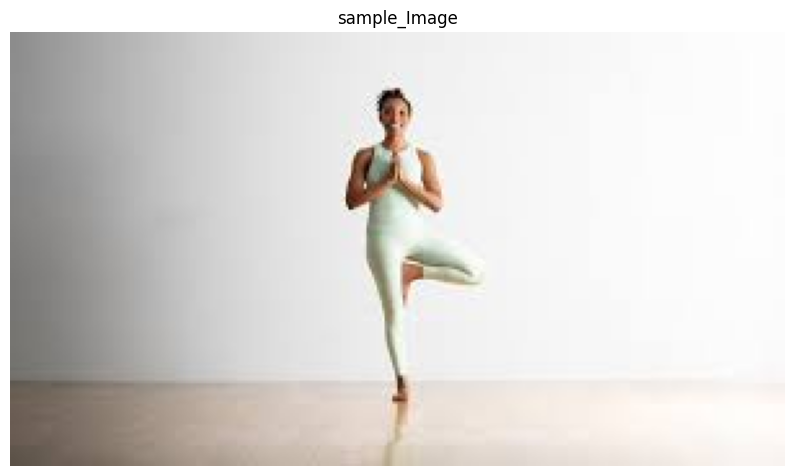

In [25]:
import os
input_folder = './Poses/'
for filename in os.listdir(input_folder): 
        file_path = os.path.join(input_folder, filename)         
        sample_img  = cv2.imread(file_path)
        plt.figure(figsize = [10,10])
        plt.title("sample_Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()
                    
        


In [12]:

sample_img  = cv2.imread('test.jpg')


In [13]:
def return_angle(landmark1, landmark2, landmark3):
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    x3, y3 = landmark3.x, landmark3.y

    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) -
                         math.atan2(y1 - y2, x1 - x2))

    if angle < 0:
        angle += 360

    # Return the calculated angle.
    return angle


In [19]:
def calculate_angle(a):
    left_elbow_angle = return_angle(
        a['left_shoulder'], a['left_elbow'], a['left_wrist'])
    right_elbow_angle = return_angle(
        a['right_shoulder'], a['right_elbow'], a['right_wrist'])
    left_shoulder_angle = return_angle(
        a['left_elbow'], a['left_shoulder'], a['left_hip'])
    right_shoulder_angle = return_angle(
        a['right_elbow'], a['right_shoulder'], a['right_hip'])
    left_hip_angle = return_angle(
        a['left_knee'], a['left_hip'], a['left_shoulder'])
    right_hip_angle = return_angle(
        a['right_knee'], a['right_hip'], a['right_shoulder'])
    left_knee_angle = return_angle(a['left_ankle'], a['left_knee'], a['left_hip'])
    right_knee_angle = return_angle(
        a['right_ankle'], a['right_knee'], a['right_hip'])
    return left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle       


In [22]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
a = dict()
# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterate two times as we only want to display first two landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        name = (mp_pose.PoseLandmark(i).name).lower()
        x = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x
        y = results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y
        a[name] = Joint(name, x, y)
    left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle = calculate_angle(a)


In [21]:
with open('data.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow([left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle])
